# ANÁLISE DOS DADOS DA HEALTH INSURANCE - EDA 

- Id: identificador único do cliente.
- Gender: gênero do cliente.
- Age: idade do cliente.
- Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )
- Region Code: código da região do cliente.
- Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.
- Vehicle Age: idade do veículo.
- Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.
- Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.
- Policy sales channel: código anônimo para o canal de contato com o cliente.
- Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.
- Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.

## Obtenção dos Dados

In [1]:
# Importando os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Carregando os dados


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Visualização dos dados


In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [6]:
# Verificando os tipos de dados.

print('Número de linhas:',train.shape[0])
print('Número de colunas:', train.shape[1],'\n')
print('Tipos de variáveis:','\n', train.dtypes)

Número de linhas: 381109
Número de colunas: 12 

Tipos de variáveis: 
 id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


## Resumo estatístico

In [7]:
# Variáveis númericas

train.describe().round(2)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00
mean,190555.00,38.82,1.00,26.39,0.46,30564.39,112.03,154.35,0.12
std,110016.84,15.51,0.05,13.23,0.50,17213.16,54.20,83.67,0.33
min,1.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,95278.00,25.00,1.00,15.00,0.00,24405.00,29.00,82.00,0.00
50%,190555.00,36.00,1.00,28.00,0.00,31669.00,133.00,154.00,0.00
75%,285832.00,49.00,1.00,35.00,1.00,39400.00,152.00,227.00,0.00
max,381109.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [8]:
# Variáveis categóricas

train.describe(include = ['O'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


# Exploratory Data Analysis (EDA)

In [9]:
# Verificando valores duplicados:
if any(train.id.duplicated()) is True:
   print(f'Existe valores duplicados? {True}')
else:
   print(f'Existe valores duplicados? {False}')

Existe valores duplicados? False


In [10]:
# Verificando valores ausentes 

train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
# Verificando valores ausentes 

test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
categoricalFeatures = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
numericFeatures = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

# categoricalFeatures = train.select_dtypes(include = ['object']).columns

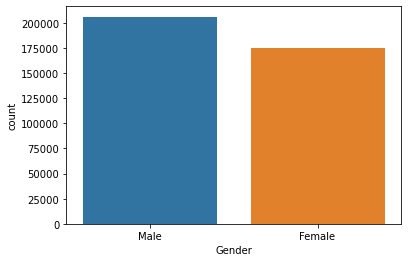

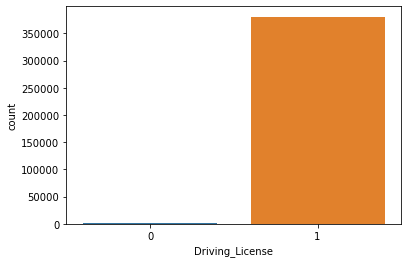

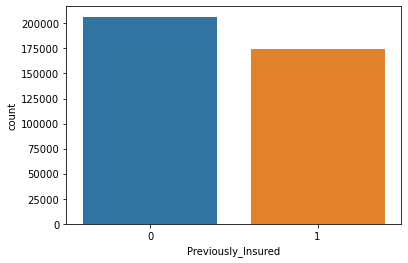

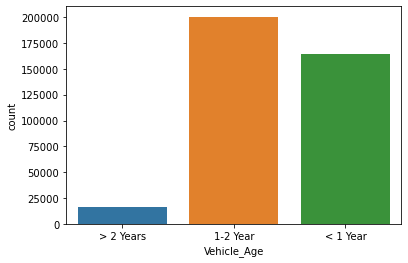

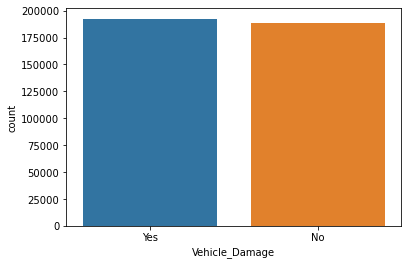

In [13]:
# Gráficos das variáveis categóricas

for i in categoricalFeatures:
    sns.countplot(train[i])
    plt.show()

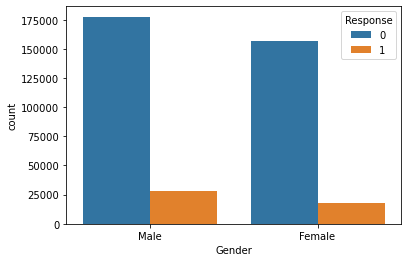

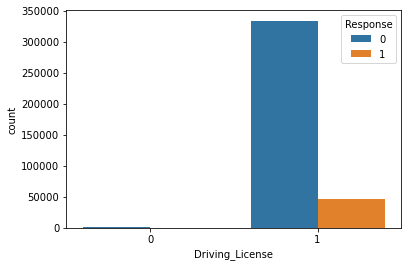

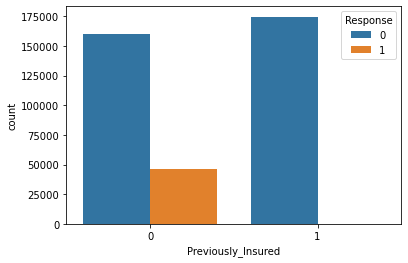

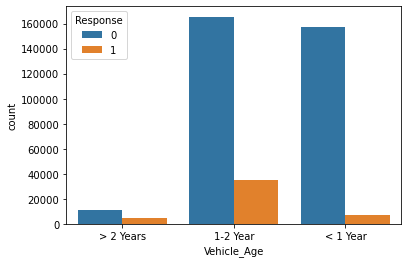

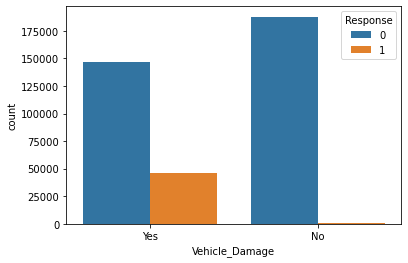

In [14]:
# Gráficos das variáveis categóricas com Response 

for i in categoricalFeatures:
    sns.countplot(x = i, hue = 'Response', data = train)
    plt.show()

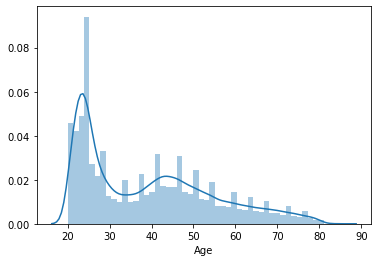

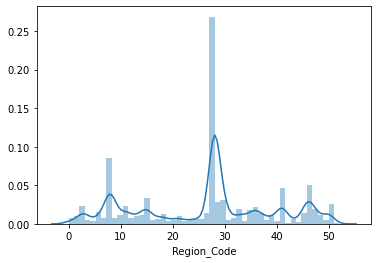

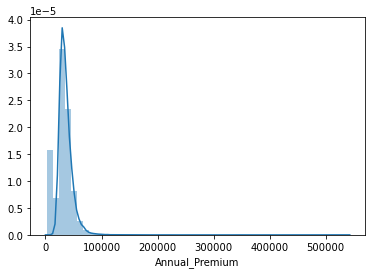

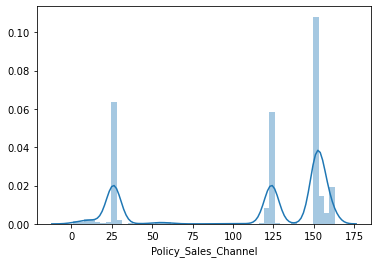

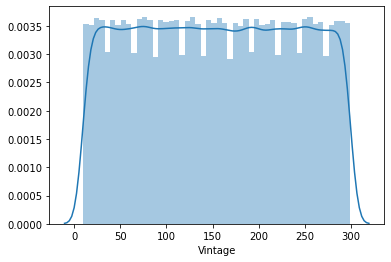

In [15]:
# Gráficos das variáveis numéricas

for i in numericFeatures:
    sns.distplot(train[i])
    plt.show()

<AxesSubplot:ylabel='Age'>

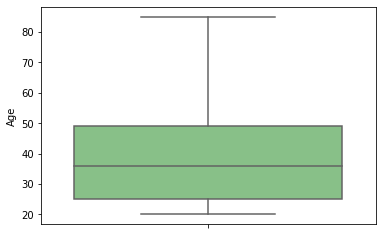

In [16]:
# Distribuição das idades dos clientes

sns.boxplot(y = 'Age', data = train, palette = 'Accent')

<AxesSubplot:ylabel='Annual_Premium'>

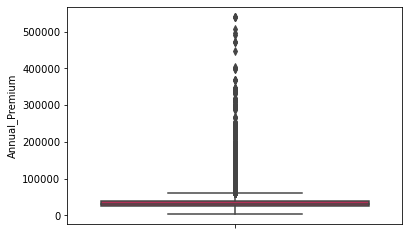

In [17]:
# Distribuição Annual Premium

sns.boxplot(y = 'Annual_Premium', data = train, palette= 'rocket')

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

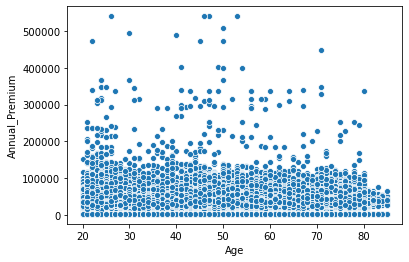

In [18]:
# Age vs Annual Premium 

sns.scatterplot(x = train['Age'], y = train['Annual_Premium'])

In [19]:
train['Gender'] = train['Gender'].replace({'Male':1,'Female':0})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [21]:
train['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace = True)
train['Vehicle_Age'] = train['Vehicle_Age'].replace({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


<AxesSubplot:>

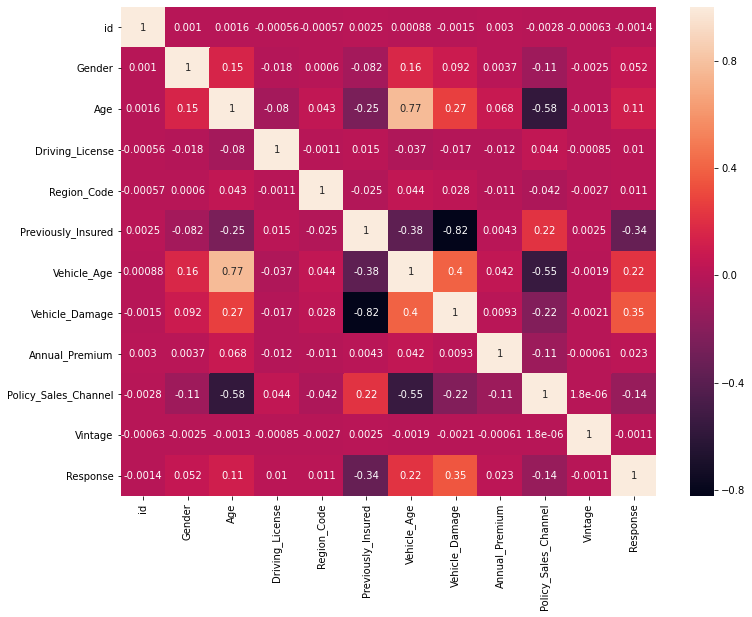

In [22]:
trainCorr = train.corr()
plt.figure(figsize = (12,9))
sns.heatmap(trainCorr, annot = True)

In [23]:
# CORRELAÇÃO

trainCorr['Age'].sort_values(ascending = False).round(3)

Age                     1.000
Vehicle_Age             0.766
Vehicle_Damage          0.268
Gender                  0.146
Response                0.111
Annual_Premium          0.068
Region_Code             0.043
id                      0.002
Vintage                -0.001
Driving_License        -0.080
Previously_Insured     -0.255
Policy_Sales_Channel   -0.578
Name: Age, dtype: float64

In [24]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


# Modelagem

In [25]:
X = train[['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage',
          'Annual_Premium','Policy_Sales_Channel','Vintage']]
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,3,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,0,33536.0,26.0,183
2,1,47,1,28.0,0,3,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [26]:
y = train[['Response']]
y.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 6)

In [28]:
# StandarScaler

stdScaler = StandardScaler()
x_train = stdScaler.fit_transform(x_train)
x_test = stdScaler.transform(x_test)

In [29]:
# Random Forest

estimator = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 8, bootstrap = True, 
                                  max_features = 'auto')
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
accuracy = estimator.score(x_test, y_test)
print('A Acúracia do Random Forest é: \n', accuracy)

<ipython-input-29-ebd34c79d353>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(x_train, y_train)


A Acúracia do Random Forest é: 
 0.8779151535506623


In [30]:
# KNN

estimator = KNeighborsClassifier(n_neighbors = 3)
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
accuracy = estimator.score(x_test, y_test)
print('A Acúracia do KNN é: \n', accuracy)

C:\Users\Rafa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


A Acúracia do KNN é: 
 0.8448645017737568


In [31]:
# XGBoost

estimator = XGBClassifier()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
accuracy = estimator.score(x_test, y_test)
print('A Acúracia do XGBoost é: \n', accuracy)

[18:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rafa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rafa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


A Acúracia do XGBoost é: 
 0.8775058250593002


In [32]:
# Logistic Regression

estimator = LogisticRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
accuracy = estimator.score(x_test, y_test)
report = classification_report(y_test, y_predict, labels = [0,1])
print('A Acúracia do Logistic Regression é: \n', accuracy)
print('O relatório do Logistic Regression é: \n', report)

C:\Users\Rafa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


A Acúracia do Logistic Regression é: 
 0.877757719515523
O relatório do Logistic Regression é: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     83646
           1       0.39      0.00      0.00     11632

    accuracy                           0.88     95278
   macro avg       0.64      0.50      0.47     95278
weighted avg       0.82      0.88      0.82     95278



- A regressão logística mostra uma alta precisão. Usaremos a regressão logística para prever as respostas no conjunto de dados de teste.

In [33]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [34]:
test['Gender'] = test['Gender'].replace({'Male':1,'Female':0})
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,1,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,1,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [35]:
test['Vehicle_Age'] = test['Vehicle_Age'].replace({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [36]:
test['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace = True)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,2,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,2,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [37]:
X_new = test[["Gender", "Age", "Driving_License", "Region_Code","Previously_Insured", "Vehicle_Age", "Vehicle_Damage", 
              "Annual_Premium", "Policy_Sales_Channel", "Vintage" ]]
X_new.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,2,1,33762.0,7.0,111
2,1,47,1,28.0,0,2,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [38]:
x_train1 = X
y_train1 = train['Response']
print(x_train1.head())
print(y_train1.head())

   Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            3   
1       1   76                1          3.0                   0            2   
2       1   47                1         28.0                   0            3   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183  
2               1         38294.0                  26.0       27  
3               0         28619.0                 152.0      203  
4               0         27496.0                 152.0       39  
0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64


In [39]:
# StandarScaler

stdScaler = StandardScaler()
x_train1 = stdScaler.fit_transform(x_train1)
X_new = stdScaler.transform(X_new)

In [40]:
# Usando logistic Regression

estimator = LogisticRegression()
estimator.fit(x_train1, y_train1)
y_predict1 = estimator.predict(X_new)
print('A Acúracia do Logistic Regression é: \n', y_predict1)

A Acúracia do Logistic Regression é: 
 [0 0 0 ... 0 0 0]


In [41]:
data_sample = pd.read_csv('sample_submission.csv')
data_sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [42]:
data_sample['Response'] = y_predict1
data_sample['Response'].unique()

array([0, 1], dtype=int64)

In [43]:
data_sample

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [44]:
data_sample['Response'].value_counts()

0    126963
1        74
Name: Response, dtype: int64